# AstroPy Tutorial for Jan 31st
We will follow the tutorial found here [http://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/01-03-Construction-of-an-artificial-but-realistic-image.html](http://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/01-03-Construction-of-an-artificial-but-realistic-image.html)

In [1]:
import os

# jupyterlab widget for matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from photutils.aperture import EllipticalAperture

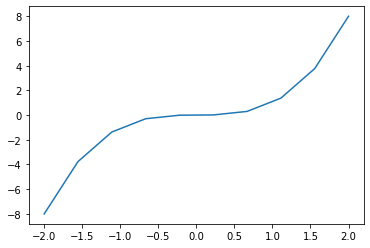

In [4]:
x=np.linspace(-2,2,10)
y=x**3
plt.plot(x,y)

## Generate a "random" stellar image for us to process

In [5]:
seed=os.getenv('GUIDE RANDOM SEED', None)
if seed is not None:
    seed = int(seed)

noise_rng = np.random.default_rng(seed)

In [6]:
noise_rng

Generator(PCG64) at 0x7FC59958A960

### Numpy example of seeding a random variable

In [7]:
np.random.seed(10)

In [8]:
np.random.randint(1,1000)

266

In [9]:
from convenience_functions import show_image

### Create a blank image

In [10]:
synthetic_image = np.zeros([1000,1000])

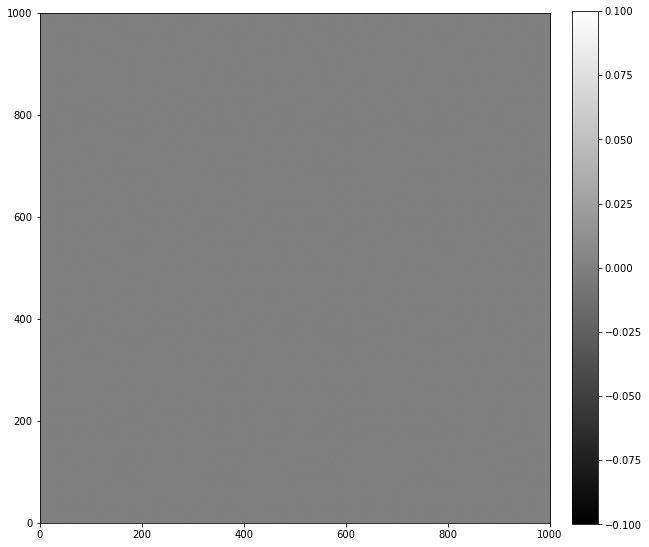

In [11]:
show_image(synthetic_image, cmap='gray')

### Add read noise
Not just adding random noise to our image. The noise will be dictated by a Gaussian curve.

In [12]:
def read_noise(image, amount, gain=1):
    shape = image.shape
    noise = noise_rng.normal(scale=amount/gain, size=shape)
    
    return noise

In [13]:
# Reset our synthetic image
synthetic_image = np.zeros([1000,1000])

In [14]:
#plt.figure()
#noise_im = synthetic_image + read_noise(synthetic_image,20)
# show_image came from convenience_functions.py script
#show_image(noise_im, cmap='gray')

### Bias

In [15]:
np.zeros_like(synthetic_image)+5

array([[5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])

In [16]:
def bias(image, value, realistic=False):
    bias_im = np.zeros_like(image) + value
    
    if realistic:
        # if we want to simulate a more realistic camera defect will use these commands instead
        shape = image.shape
        number_of_columns = 5 # our arbritrary choise of defect columns 
        
        rng = np.random.RandomState(seed=8392)
        columns = rng.randint(0,shape[1],size=number_of_columns)
        col_pattern = rng.randint(0, int(0.1*value), size=shape[0])
        
        for c in columns:
            bias_im[:,c]=value+col_pattern
    return bias_im

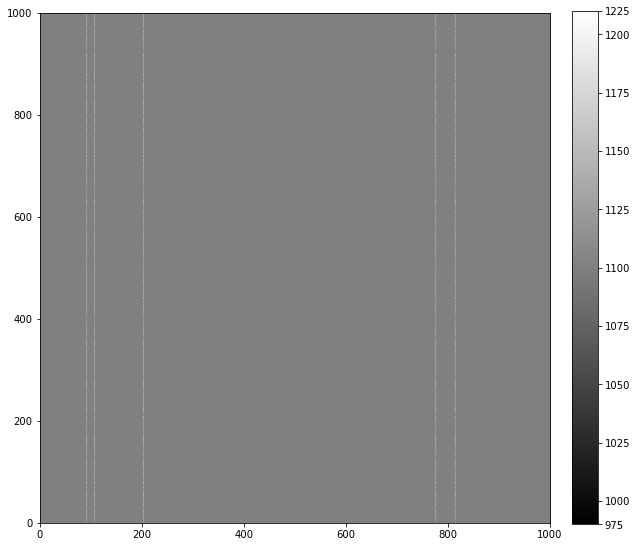

In [17]:
bias_only = bias(synthetic_image, 1100, realistic=True)
show_image(bias_only, cmap='gray')

In [18]:
bias_noise_im = noise_im+bias_only
show_image(bias_noise_im,cmap='gray')

NameError: name 'noise_im' is not defined